## Import

In [27]:
import numpy as np
import pandas as pd
import os
from classification.MNIST.getdata import get_data
from classification.MNIST.vis import plot_digit, plot_digits, save_fig
from models.Model import DataAlg

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve

import matplotlib.pyplot as plt


## Init

In [11]:
%reload_ext autoreload
%autoreload 2

In [2]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



## Get Data

In [28]:
mnist = get_data()
X, y = mnist['data'], mnist['target']

In [29]:
tr = DataAlg(X,y)
# d1 = X[0].reshape(-1,28)


## Some


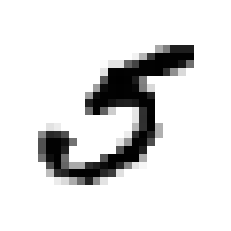

In [6]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(-1, 28)
plot_digit(some_digit)



## gggh

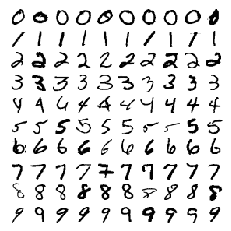

In [12]:
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [33]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
tr = DataAlg(X_train[shuffle_index], y_train[shuffle_index])
ts = DataAlg(X_test, y_test)

In [34]:
tr5 = DataAlg(tr.X, tr.y == 5)


## SGDClassifier

In [35]:

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(*tr5.X_y)
sgd_clf.predict([some_digit])

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'some_digit' is not defined


### Углубленная кросс-валидация

In [14]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96595
0.95335
0.9698



### Scikit кросс-валидация

In [15]:
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=skfolds)
conf_mat = confusion_matrix(y_train_5, y_train_pred)

ps = precision_score(y_train_5, y_train_pred)
rs = recall_score(y_train_5, y_train_pred)
fs = f1_score(y_train_5, y_train_pred)

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)